In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "Dataset/test/0_label.png"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

: 

In [2]:
path0 = "Outputs/experiment_08-07_16.26.29/inference/testData/11_label.png"
path1 = "Outputs/experiment_08-07_16.26.29/inference/testData/11_0.578_predict.png"
img1 = cv2.imread(path0, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)


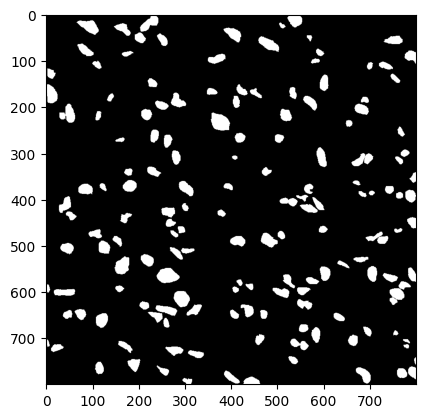

In [25]:
# plot image
diff = img1-img2
#cv2.imwrite('Outputs/experiment_08-07_16.26.29/inference/11_diff.png',diff*255)
plt.imshow(img1, cmap='gray')

In [36]:
## threshold
th, threshed = cv2.threshold(img1, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)z

## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area
s1= 0
s2 = 800
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))

Dots number: 139


In [60]:
f = open("Outputs/experiment_08-07_16.24.43/metrics.txt", "r")
fReader = f.read()
f.close()
fReader.split("\n")

['===============Training Losses ===========',
 '1.0898262547563624, 0.8802933388727683, 0.8304501383392899, 0.791599858601888, 0.7602051993652627, 0.7336972130227972, 0.7108444141017066, 0.6900391925264288, 0.6715670759148068, 0.6539421498775482, 0.6382441976335314, 0.623049239538334, 0.6070274289449056, 0.5939657962542993, 0.5802285527962225, 0.5670936108077014, 0.5560580167946992, 0.5437587770267769, 0.5328601351269969, 0.5222112044140145, 0.5135351965383247, 0.5037536677607783, 0.4956644963335108, 0.487025217016538, 0.4794265650599091, 0.47170313351684146, 0.46526550504896375, 0.4574146721539674, 0.45203351155475335, 0.445698232849439, 0.43968051811059317, 0.4351004031410924, 0.4284258053700129, 0.42530645178423987, 0.4194455913481889, 0.41496772792604236, 0.4107875300557525, 0.40625667137128335, 0.40221230264063235, 0.39820084108246695, 0.39489787980362223, 0.39121075129067456, 0.38759718983261676, 0.38449372134826804, 0.3810214038910689, 0.3779460253538909, 0.3749310287060561, 0.

In [61]:
fReader = fReader.split("\n")
trainingLoss = fReader[1]
trainingAccuracy = fReader[4]
validationLoss = fReader[7]
validationAccuracy = fReader[10]


In [62]:
# convert string array into float array
def getArray(arrayStr):
    arrayStr = arrayStr.split(",")
    array = []
    for i in arrayStr:
        array.append(float(i))
    return array

In [63]:
print(validationAccuracy)
print(validationAccuracy[0:-2])
print(getArray(validationAccuracy[0:-2]))

0.8679753598097515, 0.8739430601271851, 0.8815649874561178, 0.880100353601924, 0.8821441663111583, 0.8856476898638593, 0.8793043651000417, 0.8906713297288584, 0.8882826900124401, 0.8885895831230135, 0.8872236384606054, 0.8896015289675548, 0.8888720201919257, 0.8897122140226885, 0.8799254277091366, 0.8879405280459469, 0.8874098033197426, 0.8829156033641947, 0.8882309538764525, 0.8797312486464901, 0.888552126262326, 0.8905100597844317, 0.881199501613221, 0.8880346885767019, 0.8865705444793892, 0.8888557882495799, 0.8874382473817215, 0.8901084782233483, 0.882284567524066, 0.8891042858026782, 0.8892353434719708, 0.8810951261532312, 0.8858270490104927, 0.8849659991691688, 0.8899471573950898, 0.8835365769265839, 0.8860548559254833, 0.8731511741342421, 0.8867825583250833, 0.8832996300033054, 0.8796907005930206, 0.8887673139870291, 0.8813072672085048, 0.8843502539204975, 0.883887122004367, 0.8859039726432237, 0.8882740588424701, 0.8801507413163688, 0.8843232664082039, 0.8879462079536721, 
0.86

In [64]:
trainingLoss = getArray(trainingLoss[0:-2])
trainingAccuracy = getArray(trainingAccuracy[0:-2])
validationLoss = getArray(validationLoss[0:-2])
validationAccuracy = getArray(validationAccuracy[0:-2])

[INFO]: Plot Generation


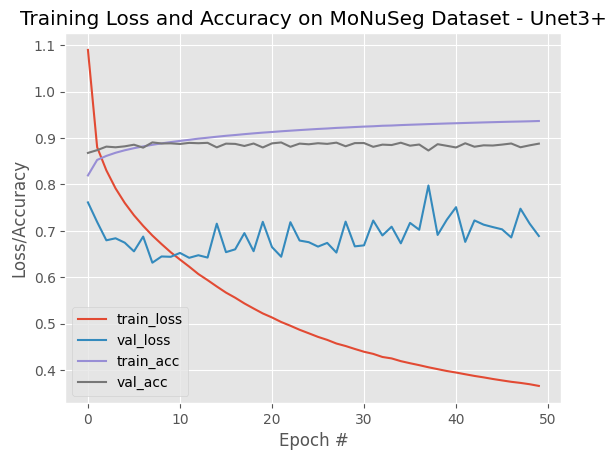

In [65]:
# plot graph for training loss and accuracy and validation loss and accuracy
print("[INFO]: Plot Generation")
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), trainingLoss, label="train_loss")
plt.plot(np.arange(0, N), validationLoss, label="val_loss")
plt.plot(np.arange(0, N), trainingAccuracy, label="train_acc")
plt.plot(np.arange(0, N), validationAccuracy, label="val_acc")
title = "Training Loss and Accuracy on MoNuSeg Dataset - Unet3+"
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")